## 勾配降下法

In [775]:
import numpy as np
import torch
from torchviz import make_dot
import matplotlib.pyplot as plt
import japanize_matplotlib

In [776]:
data = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])

x = data[:, 0]
y = data[:, 1]

(58.7, 75.7)

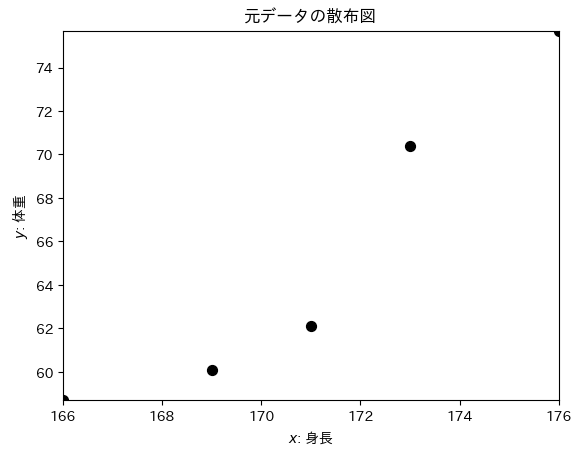

In [777]:
plt.title('元データの散布図')
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 身長')
plt.ylabel('$y$: 体重')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

(0.0, 1.0)

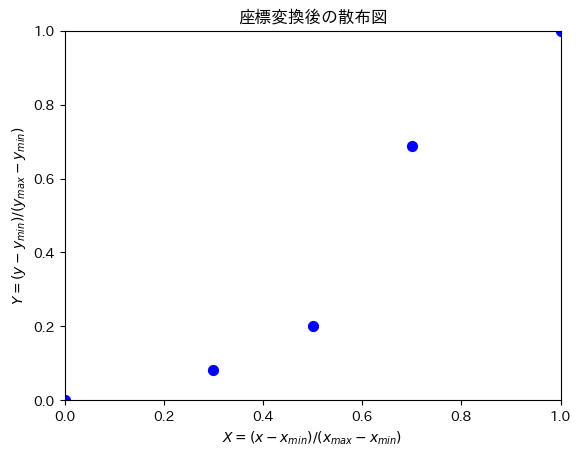

In [778]:
##### normalizeをしないと、値が大きすぎて、計算結果が発散してしまう！
X = (x - x.min()) / (x.max() - x.min())
Y = (y - y.min()) / (y.max() - y.min())

plt.title('座標変換後の散布図')
plt.scatter(X, Y, c='b', s=50)
plt.xlabel('$X = (x - x_{min}) / (x_{max} - x_{min})$')
plt.ylabel('$Y = (y - y_{min}) / (y_{max} - y_{min})$')
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

In [779]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

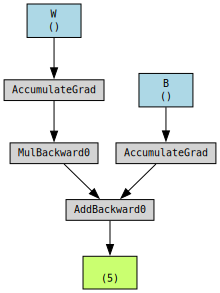

In [780]:
def pred(X, W, B):
    return W * X + B

Yp = pred(X, W, B)

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)

display(g)

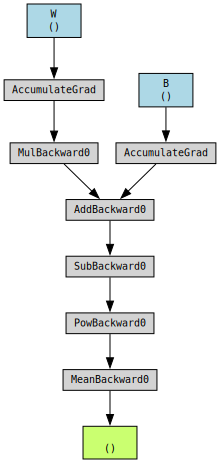

In [781]:
def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

loss = mse(Yp, Y)

g = make_dot(loss, params=params)

display(g)

In [782]:
loss.backward()

In [783]:
lr = 0.001

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    W.grad.zero_()
    B.grad.zero_()


In [784]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

In [785]:
for epoch in range(num_epochs):
    Yp = pred(X, W, B)
    loss = mse(Yp, Y)
    loss.backward()
    ##### この過程をoptimizerを使って自動化することができる
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad
        W.grad.zero_()
        B.grad.zero_()
    #####
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        if epoch % 100 == 0:
            print(f'epoch: {epoch} / loss: {loss:.4f} / (W, B) = ({W.item():.2f}, {B.item():.2f})')

print(f'W = {W.data.numpy()}')
print(f'B = {B.data.numpy()}')

print(f'init: loss = {history[0, 1]:.4f}')
print(f'last: loss = {history[-1, 1]:.4f}')

epoch: 0 / loss: 1.2393 / (W, B) = (1.00, 1.00)
epoch: 100 / loss: 0.7624 / (W, B) = (0.90, 0.80)
epoch: 200 / loss: 0.4758 / (W, B) = (0.83, 0.65)
epoch: 300 / loss: 0.3033 / (W, B) = (0.78, 0.53)
epoch: 400 / loss: 0.1994 / (W, B) = (0.74, 0.44)
W = 0.7110242247581482
B = 0.3641367256641388
init: loss = 1.2393
last: loss = 0.1417


(0.0, 500.0)

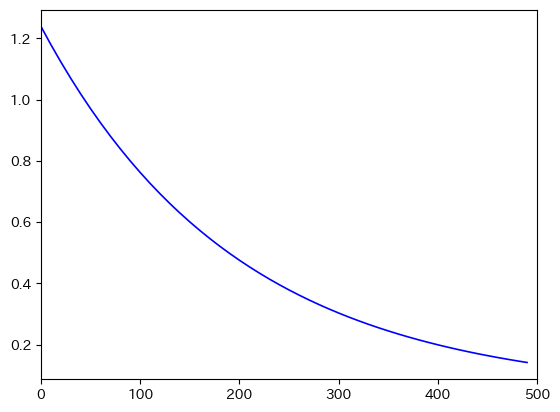

In [786]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlim(0, 500)


Text(0, 0.5, '$Y = (y - y_{min}) / (y_{max} - y_{min})$')

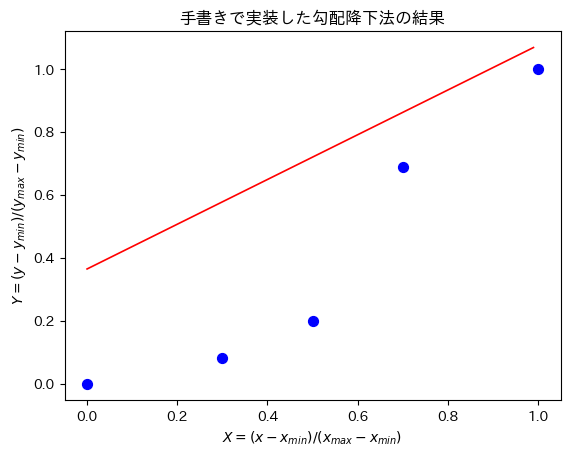

In [787]:
xx = np.arange(X.min(), X.max(), 0.01)
yy = W.item() * xx + B.item()

plt.title('手書きで実装した勾配降下法の結果')
plt.scatter(X, Y, c='b', s=50)
plt.plot(xx, yy, c='red')
plt.xlabel('$X = (x - x_{min}) / (x_{max} - x_{min})$')
plt.ylabel('$Y = (y - y_{min}) / (y_{max} - y_{min})$')



In [788]:
W2 = torch.tensor(1.0, requires_grad=True).float()
B2 = torch.tensor(1.0, requires_grad=True).float()

In [789]:
import torch.optim as optim

optimizer = optim.SGD([W2, B2], lr=lr, momentum=0.9)
history2 = np.zeros((0, 2))

for epoch in range(num_epochs):
    Yp = pred(X, W2, B2)
    loss = mse(Yp, Y)
    loss.backward()
    ##### ここがoptimizerを使った部分
    optimizer.step()
    optimizer.zero_grad()
    #####
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        if epoch % 100 == 0:
            print(f'epoch: {epoch} / loss: {loss:.4f} / (W2, B2) = ({W2.item():.2f}, {B2.item():.2f})')


epoch: 0 / loss: 1.2393 / (W2, B2) = (1.00, 1.00)
epoch: 100 / loss: 0.0418 / (W2, B2) = (0.64, 0.14)
epoch: 200 / loss: 0.0325 / (W2, B2) = (0.70, 0.07)
epoch: 300 / loss: 0.0273 / (W2, B2) = (0.76, 0.03)
epoch: 400 / loss: 0.0237 / (W2, B2) = (0.81, 0.00)


In [790]:
print(f'W2 = {W2.data.numpy()}')
print(f'B2 = {B2.data.numpy()}')

print(f'init: loss = {history2[0, 1]:.4f}')
print(f'last: loss = {history2[-1, 1]:.4f}')

W2 = 0.8548147678375244
B2 = -0.02247164398431778
init: loss = 1.2393
last: loss = 0.0215


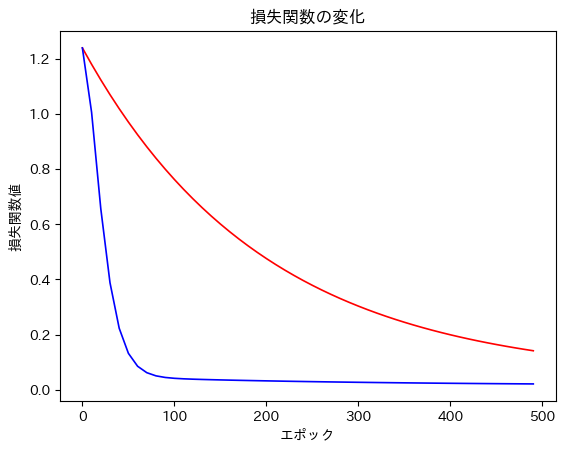

In [791]:
plt.title('損失関数の変化')
plt.xlabel('エポック')
plt.ylabel('損失関数値')
plt.plot(history[:, 0], history[:, 1], 'r')
plt.plot(history2[:, 0], history2[:, 1], 'b')

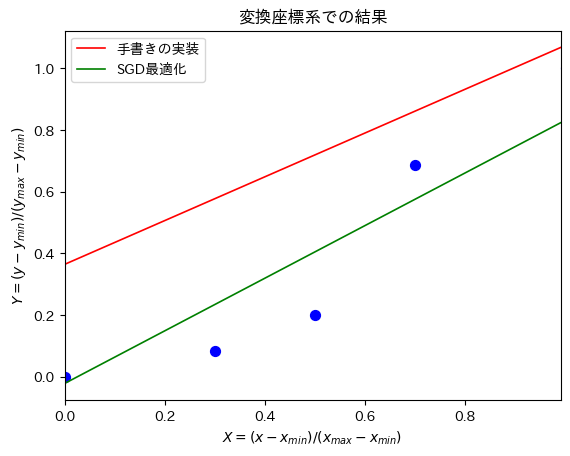

In [792]:
xx = np.arange(X.min(), X.max(), 0.01)
y1 = W.item() * xx + B.item()
y2 = W2.item() * xx + B2.item()

plt.title('変換座標系での結果')
plt.scatter(X, Y, c='blue', s=50)
plt.plot(xx, y1, c='red', label='手書きの実装')
plt.plot(xx, y2, c='green', label='SGD最適化')
plt.xlim(xx.min(), xx.max())
plt.xlabel('$X = (x - x_{min}) / (x_{max} - x_{min})$')
plt.ylabel('$Y = (y - y_{min}) / (y_{max} - y_{min})$')
plt.legend()


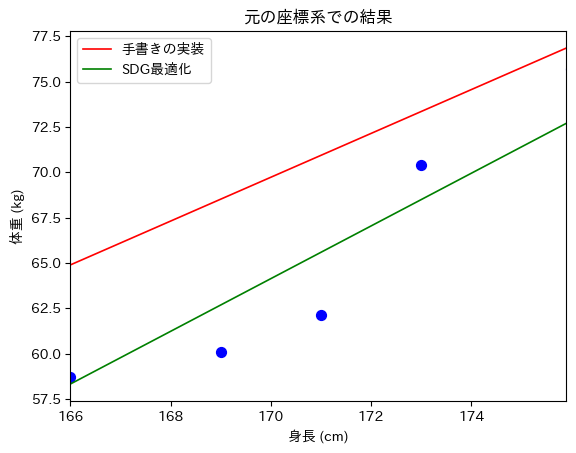

In [793]:
xx = np.arange(X.min(), X.max(), 0.01)
y1 = W.item() * xx + B.item()
y2 = W2.item() * xx + B2.item()

xx = xx * (x.max() - x.min()) + x.min()
y1 = y1 * (y.max() - y.min()) + y.min()
y2 = y2 * (y.max() - y.min()) + y.min()

plt.title('元の座標系での結果')
plt.scatter(x, y, c='blue', s=50)
plt.plot(xx, y1, c='red', label='手書きの実装')
plt.plot(xx, y2, c='green', label='SDG最適化')
plt.xlim(xx.min(), xx.max())
plt.xlabel('身長 (cm)')
plt.ylabel('体重 (kg)')
plt.legend()
